In [86]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.cluster import KMeans, DBSCAN, Birch, AffinityPropagation, MeanShift, OPTICS, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
# from geopy.distance import geodesic
from datetime import datetime

In [2]:
# Load the training and testing datasets
# open zipped dataset
with ZipFile("raw_data\lending.zip") as zip_file:
   # open the csv file in the dataset
    with zip_file.open("X_train.csv") as train_file:
       
      # read the dataset
      X_train = pd.read_csv(train_file)
    
    with zip_file.open("X_train.csv") as test_file:
       
      # read the dataset
      X_test = pd.read_csv(test_file)
       

# X_train = pd.read_csv("raw_data\X_train.csv")
# X_test = pd.read_csv("raw_data\X_test.csv")

In [3]:
# Print the shape and columns of the datasets
print("Train shape:", X_train.shape)
print("Train columns:", X_test.columns)
# print("Test shape:", test_df.shape)
# print("Test columns:", test_df.columns)

Train shape: (1199861, 45)
Train columns: Index(['index', 'acc_now_delinq', 'addr_state', 'annual_inc',
       'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs',
       'dti', 'earliest_cr_line', 'emp_length', 'fico_range_high',
       'fico_range_low', 'funded_amnt', 'home_ownership', 'inq_last_12m',
       'installment', 'int_rate', 'issue_d', 'loan_amnt', 'mort_acc',
       'mths_since_last_delinq', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_rev_accts', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'open_il_24m',
       'open_rv_24m', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies',
       'purpose', 'revol_util', 'tax_liens', 'term', 'title', 'total_acc',
       'verification_status', 'zip_code'],
      dtype='object')


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199861 entries, 0 to 1199860
Data columns (total 45 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   index                       1199861 non-null  int64  
 1   acc_now_delinq              1199861 non-null  float64
 2   addr_state                  1199861 non-null  object 
 3   annual_inc                  1199861 non-null  float64
 4   chargeoff_within_12_mths    1199824 non-null  float64
 5   collections_12_mths_ex_med  1199824 non-null  float64
 6   delinq_2yrs                 1199861 non-null  float64
 7   dti                         1199861 non-null  float64
 8   earliest_cr_line            1199861 non-null  object 
 9   emp_length                  1128114 non-null  object 
 10  fico_range_high             1199861 non-null  float64
 11  fico_range_low              1199861 non-null  float64
 12  funded_amnt                 1199861 non-null  float64
 1

In [5]:
# Check the distribution of the categorical columns
X_train.select_dtypes(include='object').nunique()

addr_state                51
earliest_cr_line         748
emp_length                11
home_ownership             6
int_rate                 669
issue_d                  160
purpose                   14
revol_util              1316
term                       2
title                  43858
verification_status        3
zip_code                 936
dtype: int64

In [6]:
X_test.select_dtypes(include='object').nunique()

addr_state                51
earliest_cr_line         748
emp_length                11
home_ownership             6
int_rate                 669
issue_d                  160
purpose                   14
revol_util              1316
term                       2
title                  43858
verification_status        3
zip_code                 936
dtype: int64

In [7]:
# descriptive statistics central tendency, dispersion shape of distribution
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1199861.0,599930.000000,346370.180007,0.00,299965.00,599930.00,899895.00,1.199860e+06
acc_now_delinq,1199861.0,0.004626,0.072842,0.00,0.00,0.00,0.00,6.000000e+00
annual_inc,1199861.0,78110.512218,136351.414907,2300.00,47000.00,65000.00,93000.00,1.100000e+08
chargeoff_within_12_mths,1199824.0,0.008901,0.108155,0.00,0.00,0.00,0.00,1.000000e+01
collections_12_mths_ex_med,1199824.0,0.018102,0.150731,0.00,0.00,0.00,0.00,2.000000e+01
delinq_2yrs,1199861.0,0.314226,0.876369,0.00,0.00,0.00,0.00,4.200000e+01
dti,1199861.0,18.038746,8.404678,-1.00,11.74,17.55,23.97,4.996000e+01
fico_range_high,1199861.0,701.200282,32.341045,664.00,674.00,694.00,719.00,8.500000e+02
fico_range_low,1199861.0,697.200134,32.340365,660.00,670.00,690.00,715.00,8.450000e+02
funded_amnt,1199861.0,14404.663894,8855.222599,500.00,7675.00,12000.00,20000.00,4.000000e+04


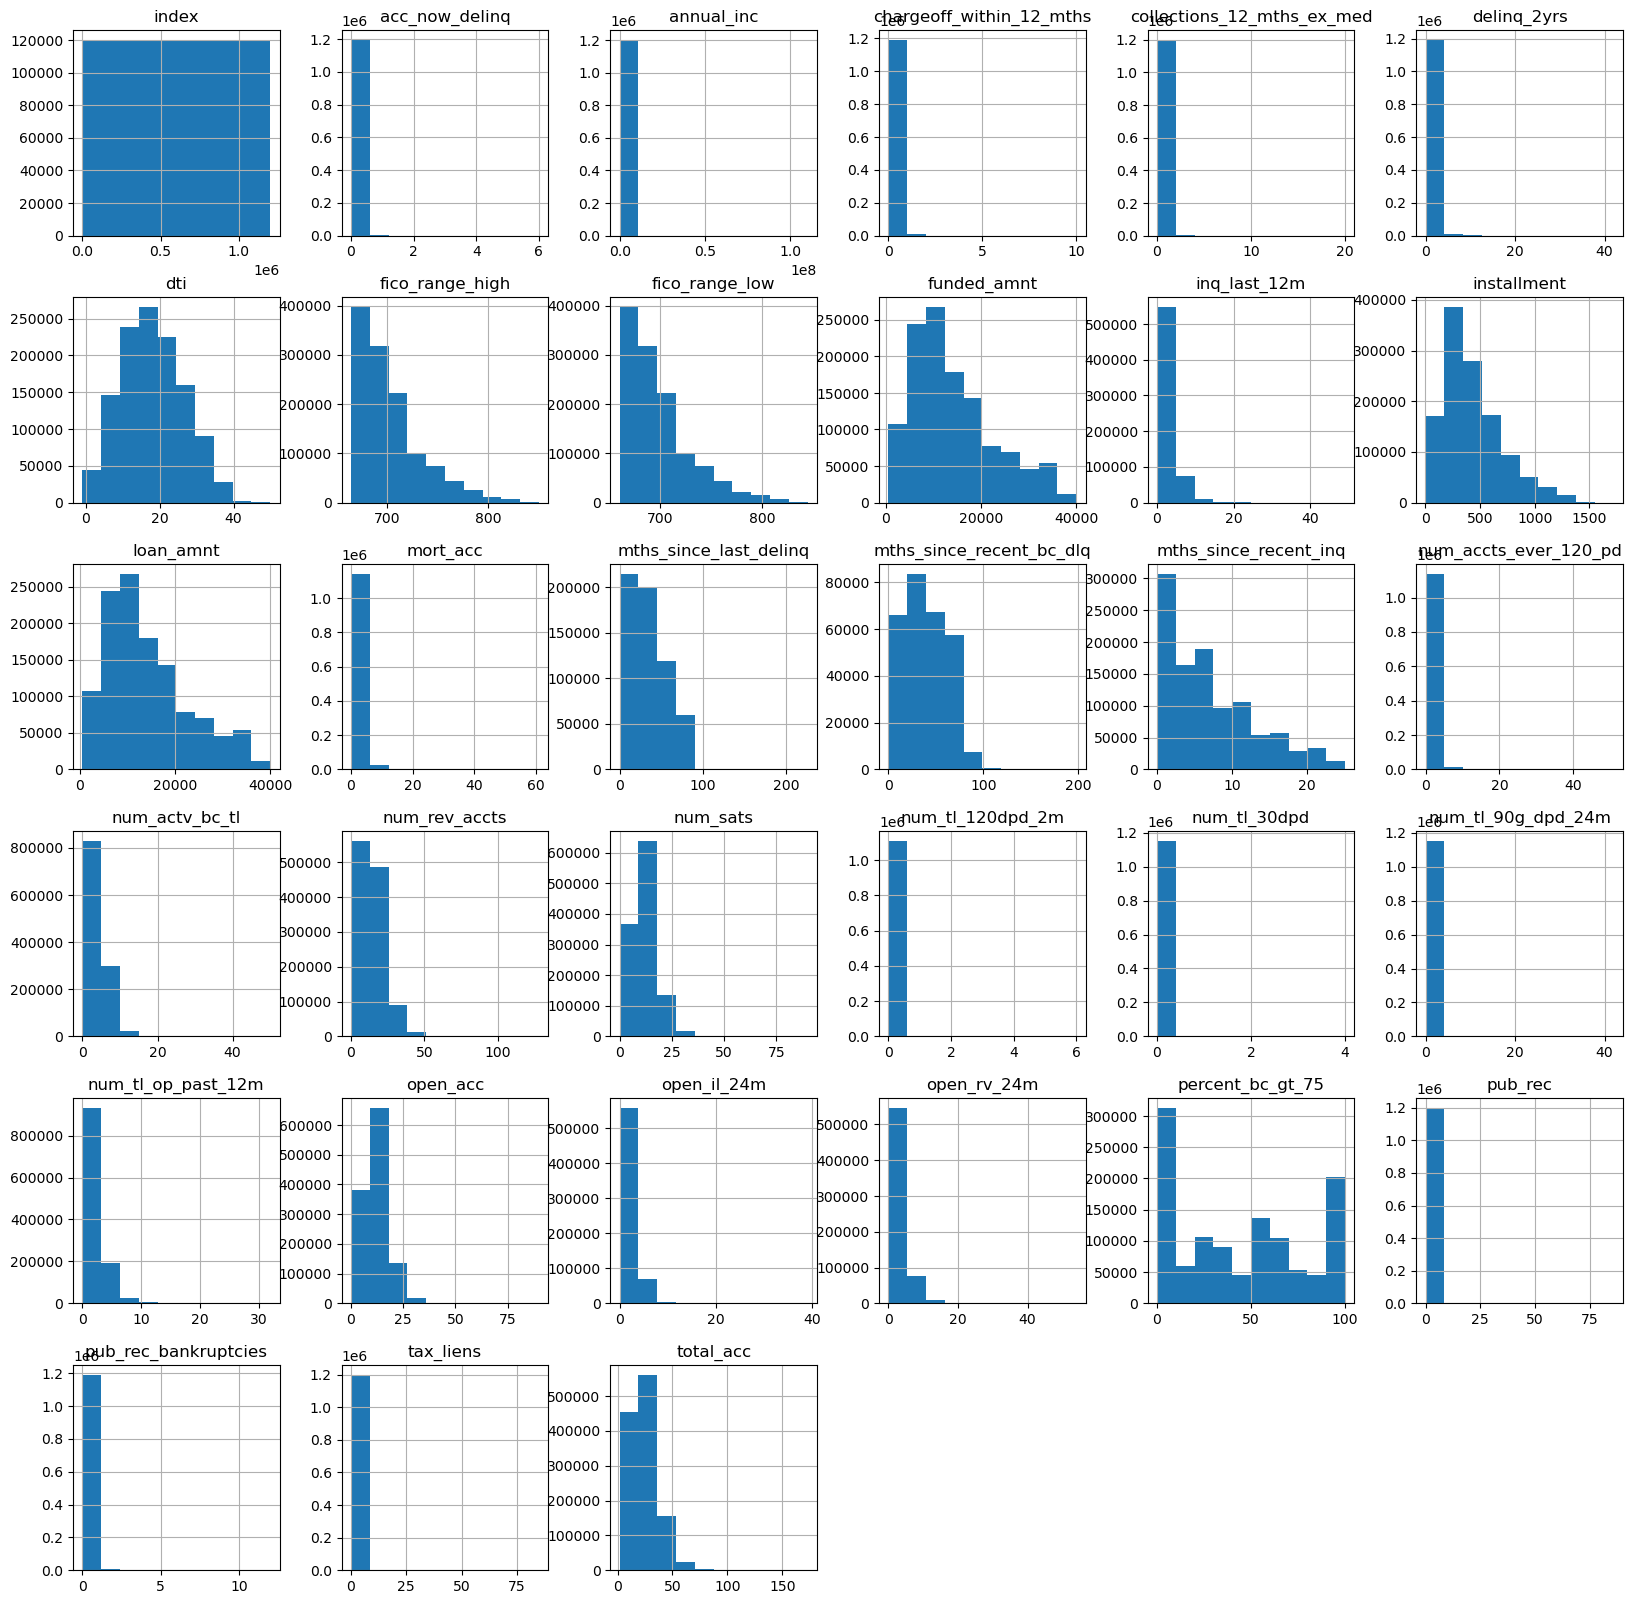

In [8]:
# Plot histograms of the numerical columns
X_train.hist(figsize=(20,20))
plt.show()

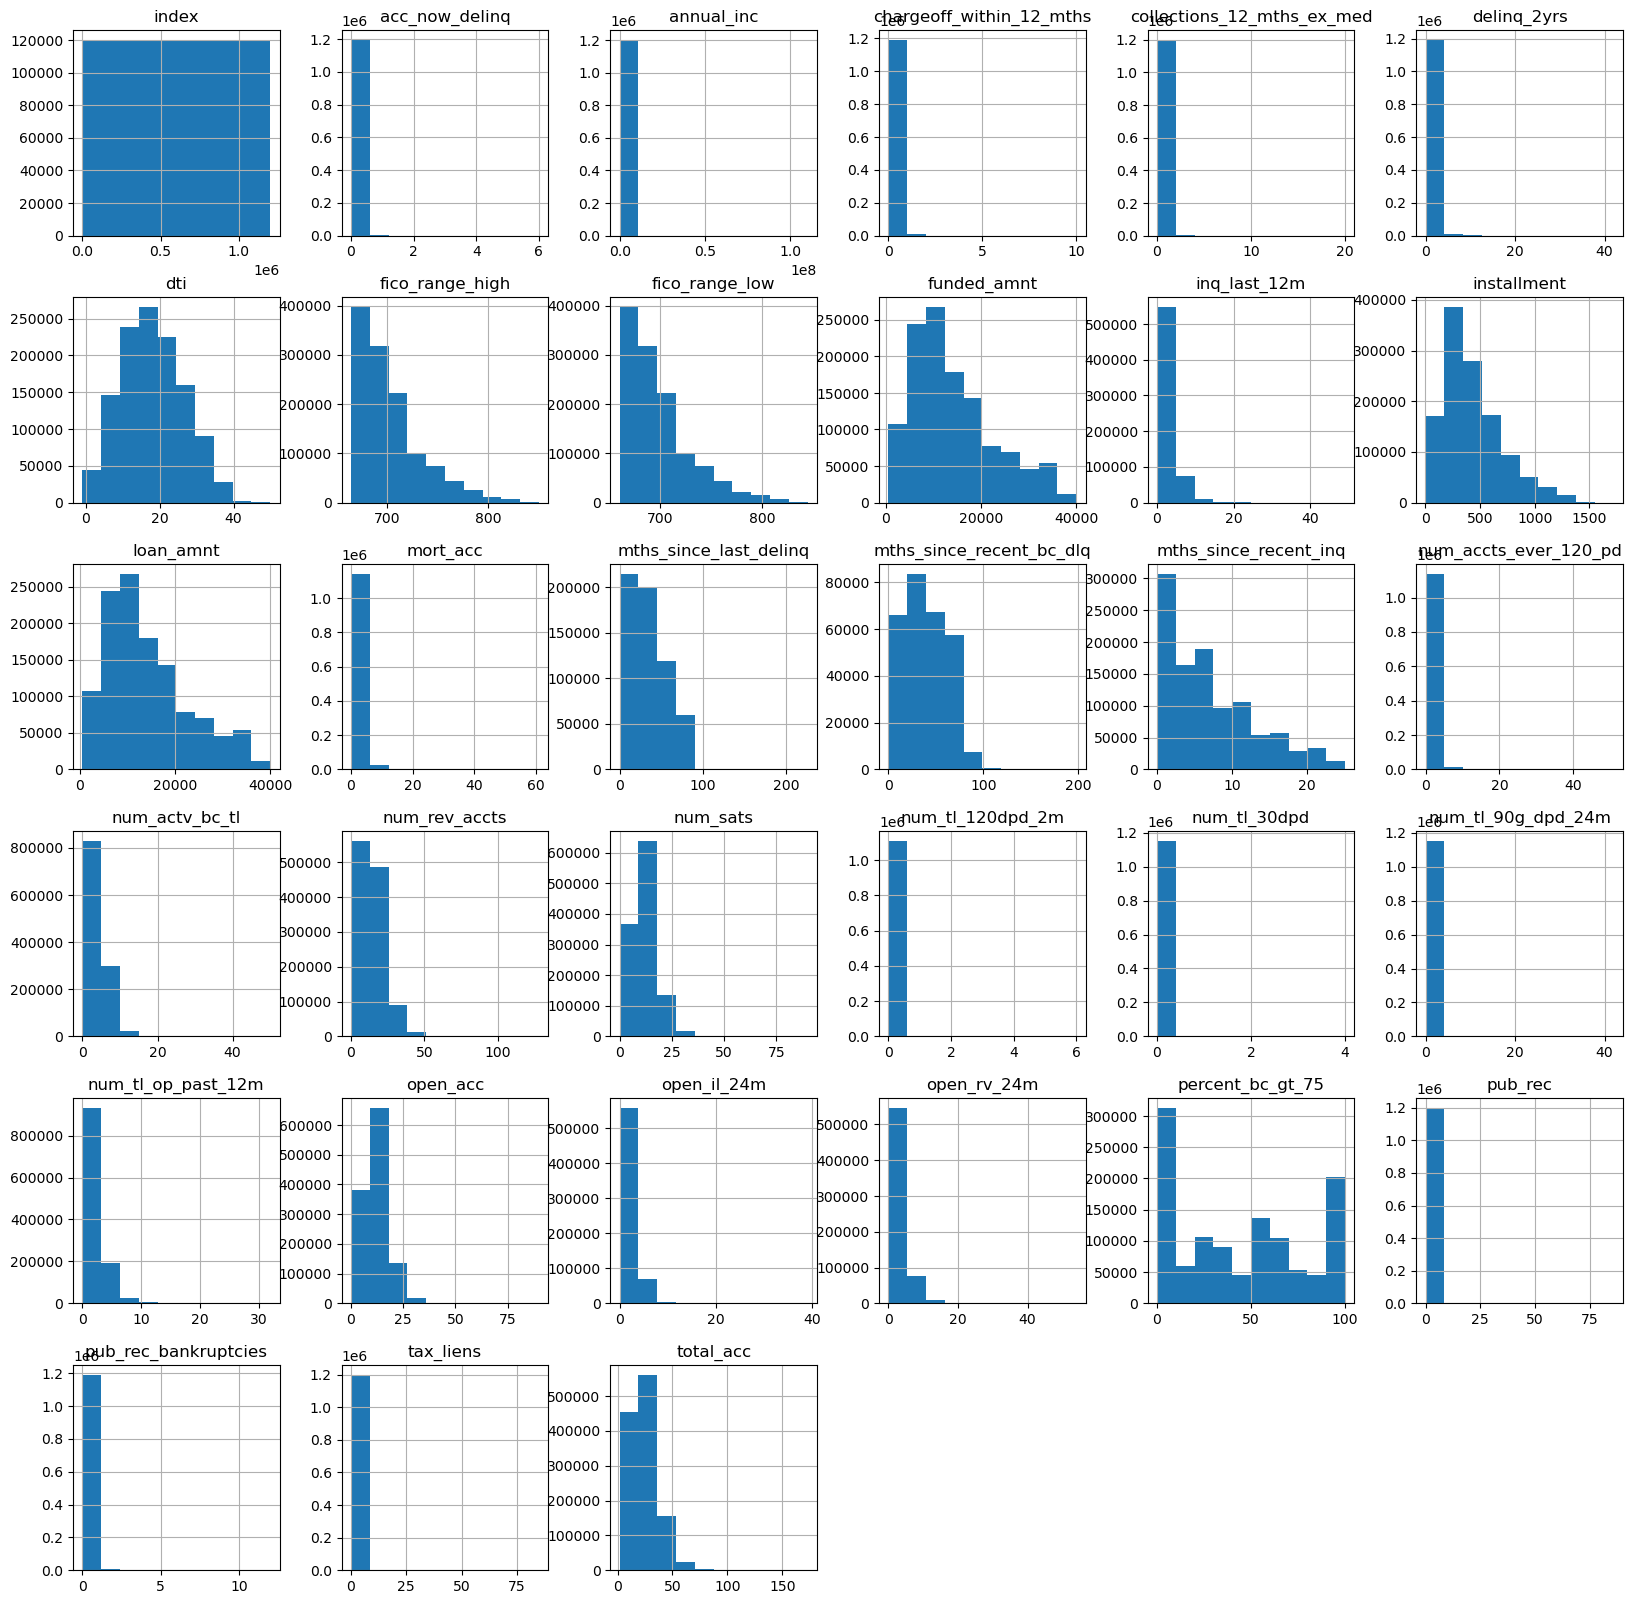

In [9]:
X_test.hist(figsize=(20,20))
plt.show()

In [10]:
# # Plot boxplots of the numerical columns
# fig, axes = plt.subplots(9, 4, figsize=(20,40))
# for i, col in enumerate(X_train.select_dtypes(include='number').columns):
#     sns.boxplot(x=X_train[col], ax=axes[i//4, i%4])
# plt.tight_layout()
# plt.show()

In [11]:
# fig, axes = plt.subplots(9, 4, figsize=(20,40))
# for i, col in enumerate(X_test.select_dtypes(include='number').columns):
#     sns.boxplot(x=X_test[col], ax=axes[i//4, i%4])
# plt.tight_layout()
# plt.show()

In [12]:
# # Plot countplots of the categorical columns
# fig, axes = plt.subplots(6, 2, figsize=(20,30))
# for i, col in enumerate(X_train.select_dtypes(include='object').columns):
#     sns.countplot(x=X_train[col], ax=axes[i//2, i%2])
#     plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

In [13]:
# fig, axes = plt.subplots(6, 2, figsize=(20,30))
# for i, col in enumerate(X_test.select_dtypes(include='object').columns):
#     sns.countplot(x=X_test[col], ax=axes[i//2, i%2])
#     plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

<AxesSubplot:>

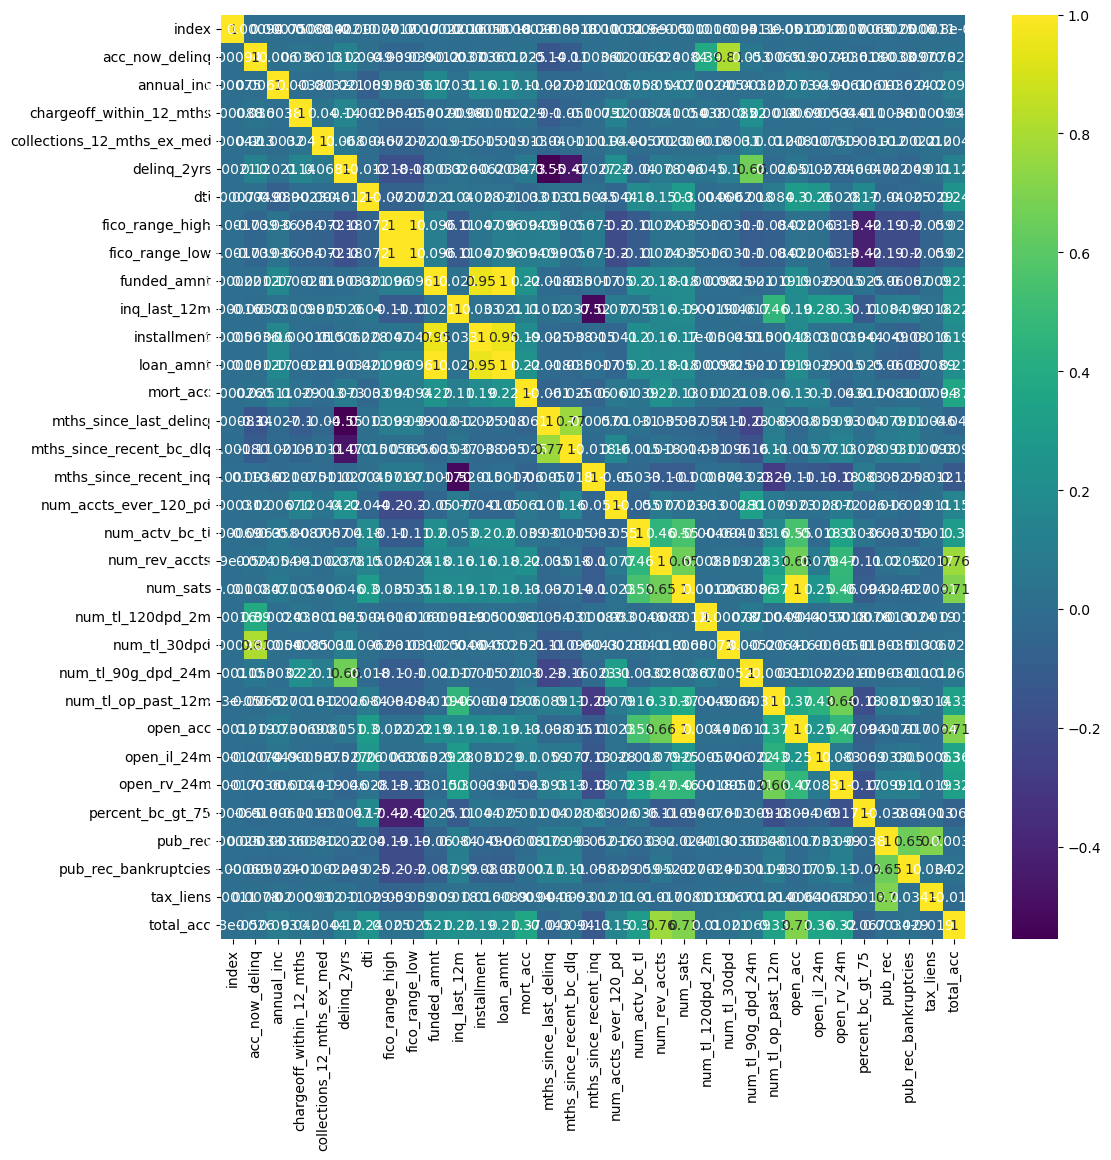

In [14]:
# Check the correlation matrix of the numerical columns
plt.figure(figsize=(12, 12))
sns.heatmap(X_train.corr(), annot=True, cmap='viridis')

# corr_matrix = X_train.corr()
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

In [15]:
# # Check the correlation matrix of the numerical columns
# plt.figure(figsize=(12, 12))
# sns.heatmap(X_test.corr(), annot=True, cmap='viridis')

# # corr_matrix = X_test.corr()
# # sns.heatmap(corr_matrix, annot=True)
# # plt.show()

In [16]:
# X_train.corr()

### Feature Engineering

In [17]:
# # Drop the index column from the datasets
# X_train.drop('index', axis=1, inplace=True)
# X_test.drop('index', axis=1, inplace=True)

In [18]:
# Define the numerical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
num_cols
# # or 
# numerical_cols = X_train.select_dtypes(include=[np.number]).columns
# numerical_cols

# ['acc_now_delinq', 'annual_inc','chargeoff_within_12_mths',
#             'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'fico_range_high', 
#             'fico_range_low', 'funded_amnt',  'inq_last_12m', 'installment', 'int_rate', 
#             'loan_amnt', 'mort_acc', 'mths_since_last_delinq', 'mths_since_recent_bc_dlq', 
#             'mths_since_recent_inq',  'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_rev_accts', 
#             'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 
#             'num_tl_op_past_12m', 'open_acc', 'open_il_24m',  'open_rv_24m', 'percent_bc_gt_75',
#             'pub_rec', 'pub_rec_bankruptcies','revol_util','tax_liens','total_acc']

Index(['index', 'acc_now_delinq', 'annual_inc', 'chargeoff_within_12_mths',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'fico_range_high',
       'fico_range_low', 'funded_amnt', 'inq_last_12m', 'installment',
       'loan_amnt', 'mort_acc', 'mths_since_last_delinq',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_rev_accts', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'open_acc', 'open_il_24m', 'open_rv_24m',
       'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'tax_liens',
       'total_acc'],
      dtype='object')

In [19]:
# Define the categorical columns
cat_cols = X_train.select_dtypes(exclude='number').columns
cat_cols

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'home_ownership',
       'int_rate', 'issue_d', 'purpose', 'revol_util', 'term', 'title',
       'verification_status', 'zip_code'],
      dtype='object')

In [20]:
# # Handle missing values in numerical columns using KNN imputation
# imputer = KNNImputer() # n_neighbors=5, 2
# X_train[num_cols] = imputer.fit_transform(X_train[num_cols])

In [21]:
# X_test[num_cols] = imputer.transform(X_test[num_cols])

In [22]:
#  "loan_amnt" & "installment"
X_train.groupby(by='loan_amnt')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,,,,,,,,
500.0,3.0,16.083333,0.341955,15.69,15.9700,16.250,16.2800,16.31
725.0,1.0,22.510000,NaN,22.51,22.5100,22.510,22.5100,22.51
750.0,1.0,25.020000,NaN,25.02,25.0200,25.020,25.0200,25.02
900.0,2.0,28.815000,0.487904,28.47,28.6425,28.815,28.9875,29.16
950.0,1.0,30.550000,NaN,30.55,30.5500,30.550,30.5500,30.55
...,...,...,...,...,...,...,...,...
39900.0,8.0,1063.003750,212.558695,796.49,858.8100,1104.465,1251.0150,1282.79
39925.0,4.0,1195.590000,166.019910,950.24,1165.4300,1267.320,1297.4800,1297.48
39950.0,2.0,949.720000,31.423825,927.50,938.6100,949.720,960.8300,971.94


In [23]:
loan_amnt_corr_installment = X_train['loan_amnt'].corr(X_train['installment'])
print(f"The correlation between {X_train['loan_amnt'].name} and {X_train['installment'].name} is {loan_amnt_corr_installment:.2f}")

The correlation between loan_amnt and installment is 0.95


In [24]:
X_train['home_ownership'].value_counts()

MORTGAGE    584286
RENT        481209
OWN         133428
ANY            817
OTHER           93
NONE            28
Name: home_ownership, dtype: int64

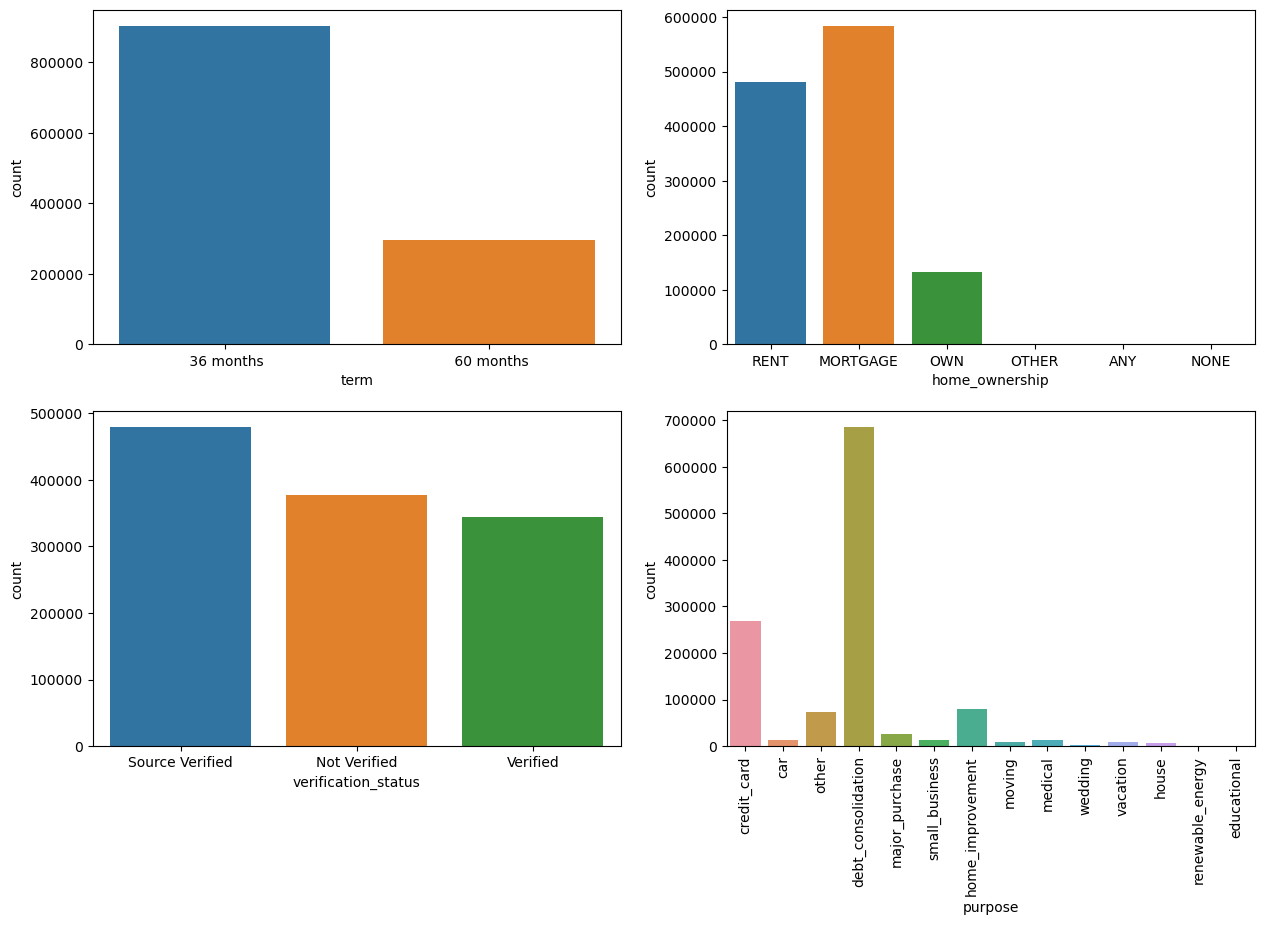

In [25]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=X_train)

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=X_train)

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=X_train)

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=X_train)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [116]:
X_train['int_rate'] = pd.to_numeric(X_train.int_rate.str.replace(" ", "").str.replace("%", ""))

In [118]:
X_train['int_rate'].nunique()

669

In [131]:
X_train['revol_util'] = pd.to_numeric(X_train.int_rate.replace("%", ""))

In [132]:
X_train['revol_util'].dtype

dtype('float64')

In [133]:
X_train['revol_util'].head()

0    12.99
1    10.42
2     8.99
3    11.53
4    26.30
Name: revol_util, dtype: float64

In [134]:
X_train['revol_util'].nunique()

669

In [26]:
#  int_rate & annual_inc
X_train.groupby(by='int_rate')['annual_inc'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
int_rate,,,,,,,,
5.31%,2000.0,104567.45,73533.57,16800.0,60000.0,89000.0,125000.0,1100000.00
5.32%,27417.0,105539.29,75614.58,10000.0,64000.0,90000.0,125000.0,3400015.00
5.42%,384.0,66441.09,40081.71,15600.0,41625.0,59000.0,80000.0,480000.00
5.79%,293.0,64359.07,31663.10,13200.0,42000.0,60000.0,80000.0,198171.96
5.93%,1232.0,100604.89,77144.23,17000.0,61000.0,85000.0,120000.0,1700000.00
...,...,...,...,...,...,...,...,...
30.79%,632.0,82046.06,46256.53,7000.0,50451.0,70000.0,100000.0,350000.00
30.84%,350.0,77169.24,55711.40,15000.0,48000.0,65000.0,89800.0,600000.00
30.89%,335.0,78028.74,50693.81,14004.0,50000.0,65000.0,95500.0,600000.00


In [27]:
# # endless operation
# int_rate_corr_annual_inc = X_train['int_rate'].corr(X_train['annual_inc'])
# print(f"The correlation between {X_train['int_rate'].name} and {X_train['annual_inc'].name} is {int_rate_corr_annual_inc:.2f}")

In [28]:
# plt.figure(figsize=(15, 20))

# plt.subplot(4, 2, 1)
# sns.countplot(x='int_rate', data=X_train)

# plt.subplot(4, 2, 2)
# sns.countplot(x='annual_inc', data=X_train)
# g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [29]:
# emp_length
print(X_train['emp_length'].isna().sum())

71747


In [30]:
print(X_train['emp_length'].nunique())

11


[Text(0, 0, '< 1 year'),
 Text(1, 0, '1 year'),
 Text(2, 0, '2 years'),
 Text(3, 0, '3 years'),
 Text(4, 0, '4 years'),
 Text(5, 0, '5 years'),
 Text(6, 0, '6 years'),
 Text(7, 0, '7 years'),
 Text(8, 0, '8 years'),
 Text(9, 0, '9 years'),
 Text(10, 0, '10+ years')]

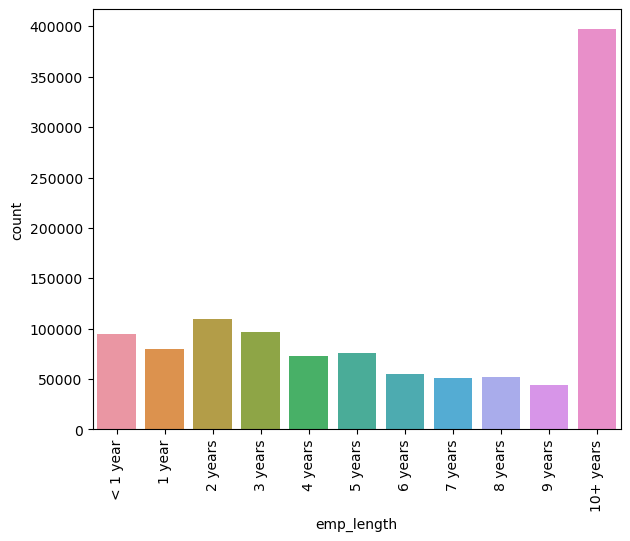

In [31]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=X_train, order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [32]:
# issue_d & earliest_cr_line

In [33]:
X_train['issue_d'] = pd.to_datetime(X_train['issue_d'])

In [34]:
X_train['earliest_cr_line'].value_counts()

Sep-2003    8116
Sep-2004    8056
Aug-2001    7923
Aug-2002    7826
Aug-2003    7741
            ... 
Dec-1950       1
Feb-2017       1
Nov-1957       1
Oct-1957       1
Jul-1955       1
Name: earliest_cr_line, Length: 748, dtype: int64

In [35]:
X_train['earliest_cr_line'] = pd.to_datetime(X_train['earliest_cr_line'])

In [36]:
# title

In [37]:
X_train.title.isna().sum()

13800

In [38]:
X_train['title'] = X_train['title'].str.lower()

In [39]:
X_train['title'].value_counts()[:10]

debt consolidation         616976
credit card refinancing    237619
home improvement            72217
other                       65748
major purchase              23442
medical expenses            13070
business                    11042
car financing               10907
vacation                     8108
moving and relocation        7393
Name: title, dtype: int64

In [40]:
# note: title will be removed because we have the purpose column with is generated from it.

In [41]:
# dti, open_acc, revol_util, & total_acc

In [42]:
X_train['dti'].value_counts()

19.20    892
16.80    863
14.40    839
18.00    836
15.60    815
        ... 
49.51      1
42.51      1
45.02      1
49.56      1
44.41      1
Name: dti, Length: 4747, dtype: int64

In [43]:
X_train['open_acc'].value_counts()

9.0     105175
10.0    101925
8.0     101381
11.0     94240
7.0      91779
         ...  
70.0         1
77.0         1
71.0         1
90.0         1
88.0         1
Name: open_acc, Length: 83, dtype: int64

In [44]:
X_train['revol_util'].value_counts()

0%        6612
57%       2356
48%       2342
58%       2318
59%       2309
          ... 
28.41%       1
117.9%       1
0.49%        1
119.1%       1
154.3%       1
Name: revol_util, Length: 1316, dtype: int64

In [45]:
X_train['total_acc'].value_counts()

20.0     43734
21.0     43192
19.0     43071
18.0     42876
22.0     42418
         ...  
173.0        1
141.0        1
135.0        1
157.0        1
117.0        1
Name: total_acc, Length: 142, dtype: int64

In [46]:
# pub_rec, mort_acc, & pub_rec_bankruptcies

In [47]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [48]:
X_train['pub_rec'] = X_train.pub_rec.apply(pub_rec)

In [49]:
X_train['mort_acc'] = X_train.mort_acc.apply(mort_acc)

In [50]:
X_train['pub_rec_bankruptcies'] = X_train.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

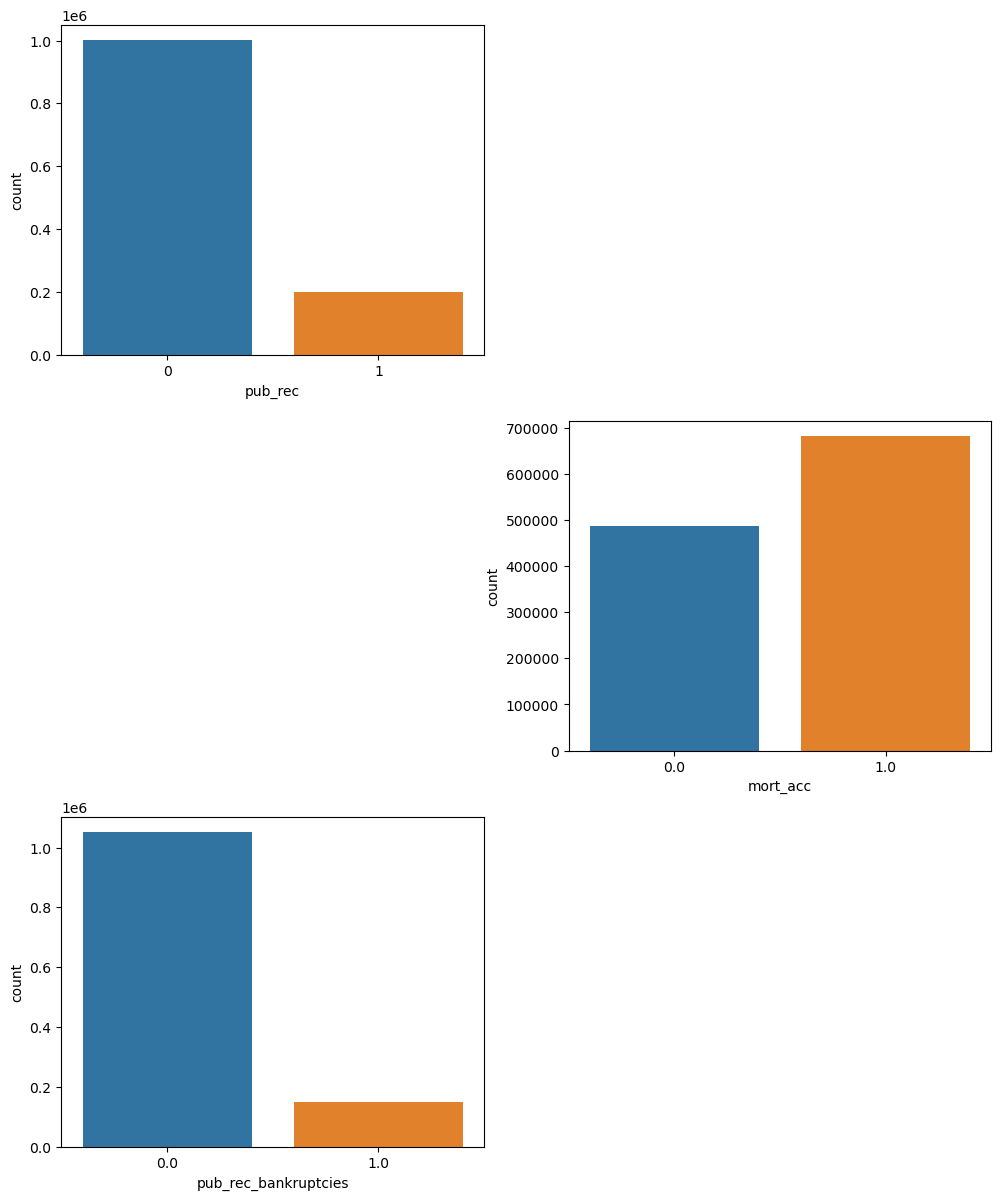

In [51]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=X_train)

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=X_train)

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=X_train)

### Data PreProcessing

In [52]:
# Missing values
for column in X_train.columns:
    if X_train[column].isna().sum() != 0:
        missing = X_train[column].isna().sum()
        portion = (missing / X_train.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'chargeoff_within_12_mths': number of missing values '37' ==> '0.003%'
'collections_12_mths_ex_med': number of missing values '37' ==> '0.003%'
'emp_length': number of missing values '71747' ==> '5.980%'
'inq_last_12m': number of missing values '567215' ==> '47.273%'
'mort_acc': number of missing values '31541' ==> '2.629%'
'mths_since_last_delinq': number of missing values '607443' ==> '50.626%'
'mths_since_recent_bc_dlq': number of missing values '917196' ==> '76.442%'
'mths_since_recent_inq': number of missing values '149781' ==> '12.483%'
'num_accts_ever_120_pd': number of missing values '45009' ==> '3.751%'
'num_actv_bc_tl': number of missing values '45009' ==> '3.751%'
'num_rev_accts': number of missing values '45010' ==> '3.751%'
'num_sats': number of missing values '37295' ==> '3.108%'
'num_tl_120dpd_2m': number of missing values '90608' ==> '7.552%'
'num_tl_30dpd': number of missing values '45009' ==> '3.751%'
'num_tl_90g_dpd_24m': number of missing values '45009' ==> '3.751%'

In [53]:
X_train.emp_length.unique()

array(['4 years', '10+ years', '3 years', '< 1 year', '5 years', '1 year',
       '7 years', '8 years', '2 years', '9 years', nan, '6 years'],
      dtype=object)

In [54]:
# drop the emp_length column
X_train.drop('emp_length', axis=1, inplace=True)

In [55]:
X_train.title.value_counts().head()

debt consolidation         616976
credit card refinancing    237619
home improvement            72217
other                       65748
major purchase              23442
Name: title, dtype: int64

In [56]:
X_train.purpose.value_counts().head()

debt_consolidation    684522
credit_card           268419
home_improvement       78972
other                  73218
major_purchase         26885
Name: purpose, dtype: int64

In [57]:
# drop the title column as it is subcategory of the purpose column
X_train.drop('title', axis=1, inplace=True)

In [58]:
X_train.mort_acc.value_counts()

1.0    681622
0.0    486698
Name: mort_acc, dtype: int64

In [59]:
X_train.mort_acc.isna().sum()

31541

In [60]:
X_train.corr()['mort_acc'].drop('mort_acc').sort_values()#.hvplot.barh()

mths_since_recent_inq        -0.061537
mths_since_last_delinq       -0.060564
open_rv_24m                  -0.026358
mths_since_recent_bc_dlq     -0.020274
dti                          -0.016864
collections_12_mths_ex_med   -0.005836
tax_liens                    -0.004049
index                        -0.000425
num_tl_120dpd_2m              0.009983
percent_bc_gt_75              0.015109
num_tl_30dpd                  0.021258
acc_now_delinq                0.024439
chargeoff_within_12_mths      0.024921
num_tl_90g_dpd_24m            0.025902
num_actv_bc_tl                0.028587
pub_rec                       0.030408
pub_rec_bankruptcies          0.034405
num_accts_ever_120_pd         0.054558
num_tl_op_past_12m            0.070570
delinq_2yrs                   0.075362
fico_range_low                0.084966
fico_range_high               0.084968
annual_inc                    0.094783
open_il_24m                   0.096809
inq_last_12m                  0.111890
num_sats                 

In [61]:
total_acc_avg = X_train.groupby(by='total_acc').mean().mort_acc

In [62]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [63]:
X_train['mort_acc'] = X_train.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [64]:
# revol_util & pub_rec_bankruptcies

In [65]:
for column in X_train.columns:
    if X_train[column].isna().sum() != 0:
        missing = X_train[column].isna().sum()
        portion = (missing / X_train.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'chargeoff_within_12_mths': number of missing values '37' ==> '0.003%'
'collections_12_mths_ex_med': number of missing values '37' ==> '0.003%'
'inq_last_12m': number of missing values '567215' ==> '47.273%'
'mths_since_last_delinq': number of missing values '607443' ==> '50.626%'
'mths_since_recent_bc_dlq': number of missing values '917196' ==> '76.442%'
'mths_since_recent_inq': number of missing values '149781' ==> '12.483%'
'num_accts_ever_120_pd': number of missing values '45009' ==> '3.751%'
'num_actv_bc_tl': number of missing values '45009' ==> '3.751%'
'num_rev_accts': number of missing values '45010' ==> '3.751%'
'num_sats': number of missing values '37295' ==> '3.108%'
'num_tl_120dpd_2m': number of missing values '90608' ==> '7.552%'
'num_tl_30dpd': number of missing values '45009' ==> '3.751%'
'num_tl_90g_dpd_24m': number of missing values '45009' ==> '3.751%'
'num_tl_op_past_12m': number of missing values '45009' ==> '3.751%'
'open_il_24m': number of missing values '567214' 

In [66]:
# use X_train.dropna(inplace=True) or not
# we need each record

### Categorical Variables and Dummy Variables

In [67]:
print([column for column in X_train.columns if X_train[column].dtype == object])

['addr_state', 'home_ownership', 'int_rate', 'purpose', 'revol_util', 'term', 'verification_status', 'zip_code']


In [68]:
X_train.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [69]:
term_values = {' 36 months': 36, ' 60 months': 60}
X_train['term'] = X_train.term.map(term_values)

In [104]:
dummies = ['verification_status', 'purpose', 'home_ownership']
X_train = pd.get_dummies(X_train, columns=dummies, drop_first=True)

In [93]:
# addr_state

In [94]:
X_train.drop('addr_state', axis=1, inplace=True)

In [72]:
# issue_d

In [74]:
X_train.drop('issue_d', axis=1, inplace=True)

In [75]:
X_train['earliest_cr_line'] = X_train.earliest_cr_line.dt.year

In [77]:
X_train.earliest_cr_line.nunique()

75

In [78]:
X_train.earliest_cr_line.value_counts()

2003    75907
2004    75253
2001    74816
2002    73756
2000    71202
        ...  
1941        1
2017        1
1945        1
1948        1
1933        1
Name: earliest_cr_line, Length: 75, dtype: int64

### Check for duplicates columns & features

In [119]:
# # Remove duplicate Features
# X_train = X_train.T.drop_duplicates()

In [135]:
# Remove Duplicate Rows
X_train.drop_duplicates(inplace=True)

In [81]:
X_train.earliest_cr_line.value_counts().head()

2003    75907
2004    75253
2001    74816
2002    73756
2000    71202
Name: earliest_cr_line, dtype: int64

In [136]:
train, test = train_test_split(X_train, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

(803906, 58)
(395955, 58)


### Models Building

###### Define a function to evaluate the clustering models

In [137]:
def evaluate_clustering(model, X_train, X_test): 
    # Fit the model on the training data 
    model.fit(X_train) # Predict the cluster labels on the test data 
    y_pred = model.predict(X_test) # Compute the silhouette score on the test data 
    score = silhouette_score(X_test, y_pred) # Return the score return score

###### Define a list of clustering models to compare

In [138]:
models = [ 
    KMeans(n_clusters=5), 
    DBSCAN(eps=0.5, min_samples=10), 
    GaussianMixture(n_components=5), 
    Birch(n_clusters=5), 
    AffinityPropagation(), 
    MeanShift(), OPTICS(min_samples=10), 
    AgglomerativeClustering(n_clusters=5), 
    SpectralClustering(n_clusters=5) ]

###### Define a list of model names

In [139]:
model_names = [ 
    "K-Means", "DBSCAN", "Gaussian Mixture Model", "BIRCH", 
    "Affinity Propagation", "Mean-Shift", "OPTICS", 
    "Agglomerative Hierarchy", "Spectral Clustering" ]

###### Create an empty dictionary to store the scores

In [140]:
scores = {}

###### Loop through the models and evaluate them

In [141]:
for i in range(len(models)): 
    # Get the model and its name 
    model = models[i] 
    name = model_names[i] 
    # Evaluate the model and store the score 
    score = evaluate_clustering(model, train, test) 
    scores[name] = score

MemoryError: Unable to allocate 356. MiB for an array with shape (803906, 58) and data type float64

###### Print the scores in descending order

In [ ]:
scores = sorted(scores.items(), key=lambda x: x[1], reverse=True) 
for name, score in scores: 
    print(f"{name}: {score:.3f}")

In [142]:
# Check the distribution of the categorical columns
# print(X_train.select_dtypes(include='object'))#.nunique()
# X_train.apply(lambda x: x.str.strip())
# X_train['int_rate'] = pd.to_numeric(X_train.int_rate.str.replace(" ", "").str.replace("%", ""))
# X_train['revol_util'] = pd.to_numeric(X_train.int_rate.str.replace("%", ""))

In [144]:
# from platform import architecture
# architecture()

('64bit', 'WindowsPE')

In [145]:
# import sys 
# print(sys.maxsize)

9223372036854775807


In [ ]:
# # Handle missing values in categorical columns using mode imputation
# imputer = SimpleImputer(strategy='most_frequent')
# X_train[cat_cols] = imputer.fit_transform(X_train[cat_cols])

In [ ]:
# X_test[cat_cols] = imputer.transform(X_test[cat_cols])

In [ ]:
# # Encode categorical columns using one-hot encoding
# encoder = OneHotEncoder(sparse=False)
# X_train_cat = encoder.fit_transform(X_train[cat_cols])
# X_test_cat = encoder.transform(X_test[cat_cols])

In [ ]:
# # Concatenate the numerical and categorical columns
# X_train = np.concatenate((X_train[num_cols], X_train_cat), axis=1)
# X_test = np.concatenate((X_test[num_cols], X_test_cat), axis=1)

In [ ]:
# # Scale numerical columns using standardization
# scaler = StandardScaler()
# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
# # Create polynomial features from numerical columns using degree 2
# poly = PolynomialFeatures(degree=2)
# X_train_poly = poly.fit_transform(X_train[num_cols])
# X_test_poly = poly.transform(X_test[num_cols])

In [ ]:
# # Extract date/time features from issue_d column
# X_train['issue_d'] = pd.to_datetime(X_train['issue_d'])
# X_test['issue_d'] = pd.to_datetime(X_test['issue_d'])
# X_train['issue_year'] = X_train['issue_d'].dt.year
# X_test['issue_year'] = X_test['issue_d'].dt.year
# X_train['issue_month'] = X_train['issue_d'].dt.month
# X_test['issue_month'] = X_test['issue_d'].dt.month
# X_train['issue_day'] = X_train['issue_d'].dt.day
# X_test['issue_day'] = X_test['issue_d'].dt.day
# X_train['issue_weekday'] = X_train['issue_d'].dt.weekday
# X_test['issue_weekday'] = X_test['issue_d'].dt.weekday

In [ ]:
# # Drop the issue_d column after extracting features
# X_train.drop('issue_d', axis=1, inplace=True)
# X_test.drop('issue_d', axis=1, inplace=True)

In [ ]:
# # Calculate the distance between zip_code and addr_state using geodesic distance
# # Assume the zip_code and addr_state are the centroids of their respective areas
# # Use a dictionary to store the coordinates of each zip_code and addr_state
# # For simplicity, use a sample dictionary with only 5 zip codes and 5 states
# zip_code_dict = {'10001': (40.7506, -73.9971), '20001': (38.9109, -77.0177), '30001': (33.7490, -84.3880), '40001': (38.2009, -84.8733), '50001': (41.6005, -93.6091)}
# addr_state_dict = {'NY': (42.1657, -74.9481), 'DC': (38.9072, -77.0369), 'GA': (33.0406, -83.6431), 'KY': (37.6681, -84.6701), 'IA': (42.0115, -93.2105)}

In [ ]:
# # Define a function to calculate the distance between two locations using their coordinates
# def geodesic_distance(loc1, loc2):
#     return geodesic(loc1, loc2).miles

In [ ]:
# # Apply the function to the zip_code and addr_state columns
# X_train['zip_state_distance'] = X_train.apply(lambda x: geodesic_distance(zip_code_dict[x['zip_code']], addr_state_dict[x['addr_state']]), axis=1)

In [ ]:
# X_test['zip_state_distance'] = X_test.apply(lambda x: geodesic_distance(zip_code_dict[x['zip_code']], addr_state_dict[x['addr_state']]), axis=1)